# Lead scoring Assignment - Logistic Regression 

### Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing dataset
Leads_data = pd.read_csv(r'C:\Users\vamshipeddapalli\Desktop\Data_science_IIIT\Main_course\Modules\Machine learning -I\Lead Scoring Assignment\Leads.csv')
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [3]:
# checking the dimensions of the dataframe
Leads_data.shape

(9240, 37)

In [4]:
# Statistical aspects of the dataframe
Leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#Type of each column
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# As we see many select values for thge columns , converting them to NAN 
Leads_data = Leads_data.replace('Select', np.nan)

In [7]:
# Checking for Null values 
Leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Checking percentage of null vlaues in each column 
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

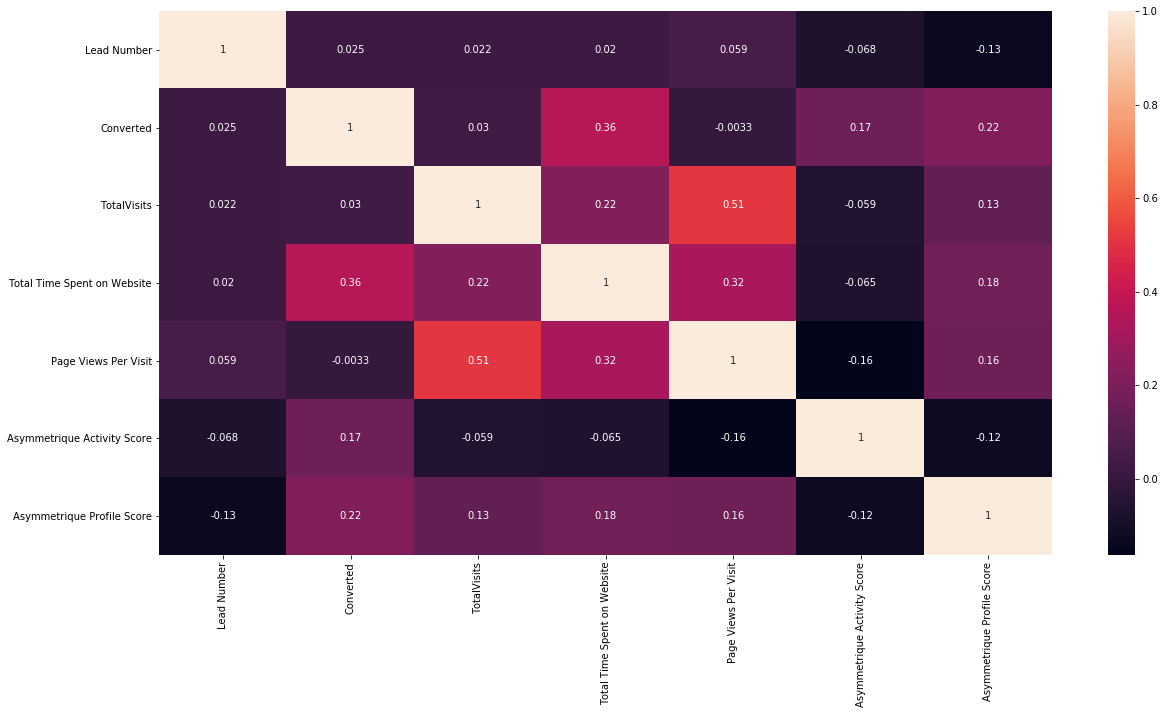

In [9]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads_data.corr(),annot = True)

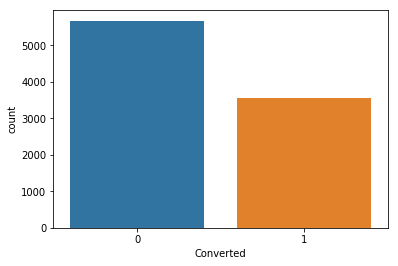

In [10]:
# Checking the converted pewople 
sns.countplot(x='Converted', data=Leads_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

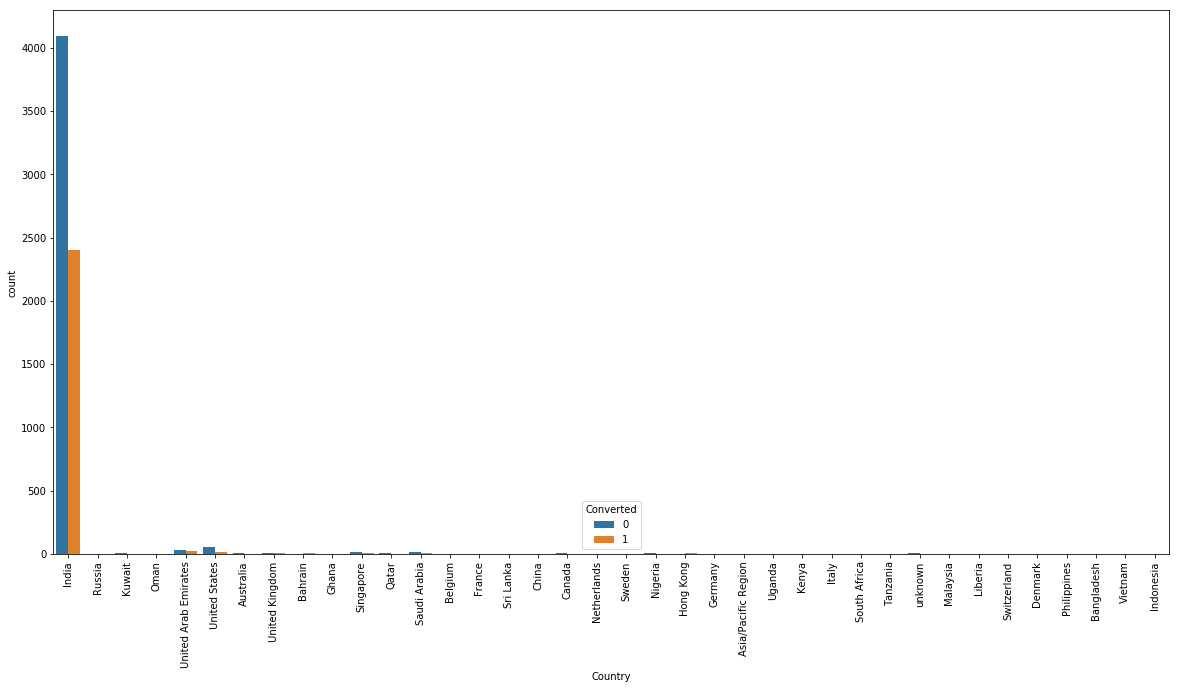

In [11]:
# Checking the converted pewople 
plt.figure(figsize = (20,10))
sns.countplot(x='Country',hue='Converted', data=Leads_data)
plt.xticks(rotation=90)

Country India has more number of converted people and at the same time non - converted people too. So our main target in the countries list here was India 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

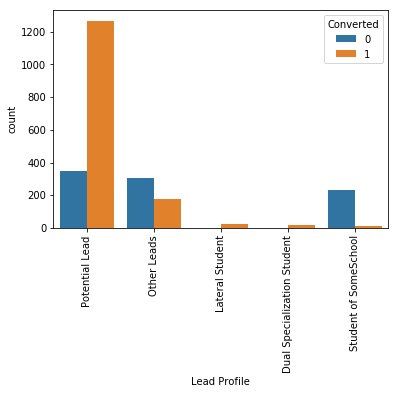

In [12]:
# Checking which profile people had converted  a lot
sns.countplot(x='Lead Profile',hue='Converted', data=Leads_data)
plt.xticks(rotation=90)

Looks like potential_Lead people had converted a lot

In [13]:
# Replacing google with Google
Leads_data['Lead Source'] = Leads_data['Lead Source'].replace(['google'], 'Google')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

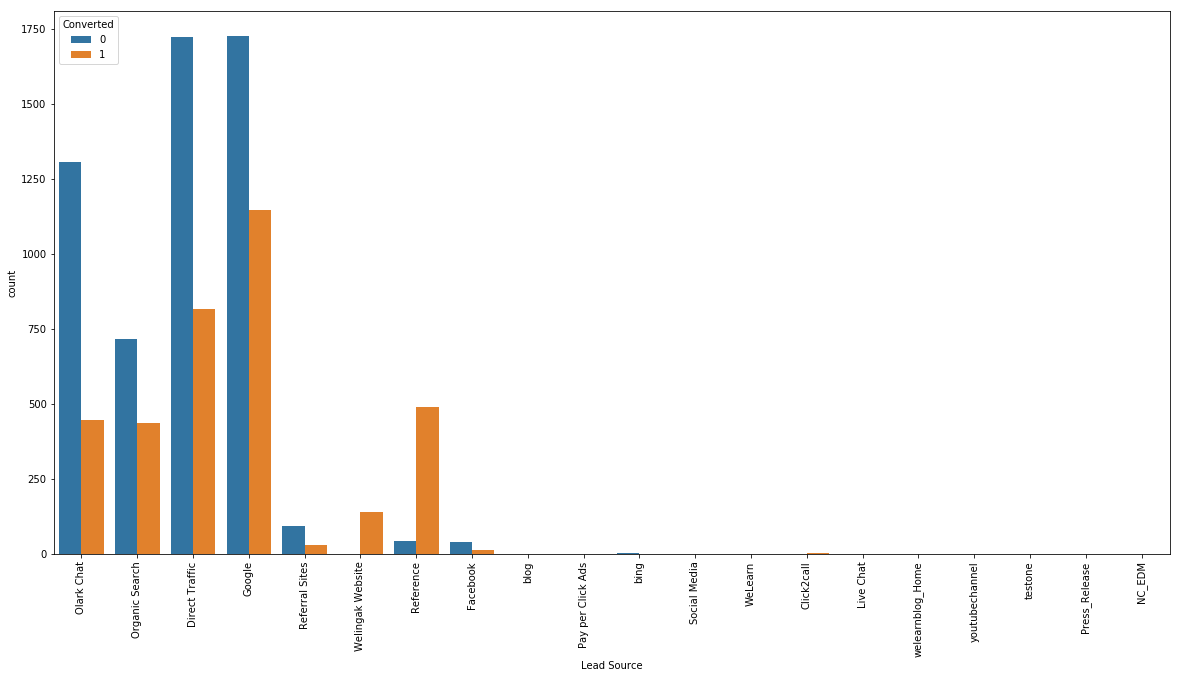

In [14]:
# Checking the lead source 
plt.figure(figsize = (20,10))
sns.countplot(x='Lead Source',hue='Converted', data=Leads_data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

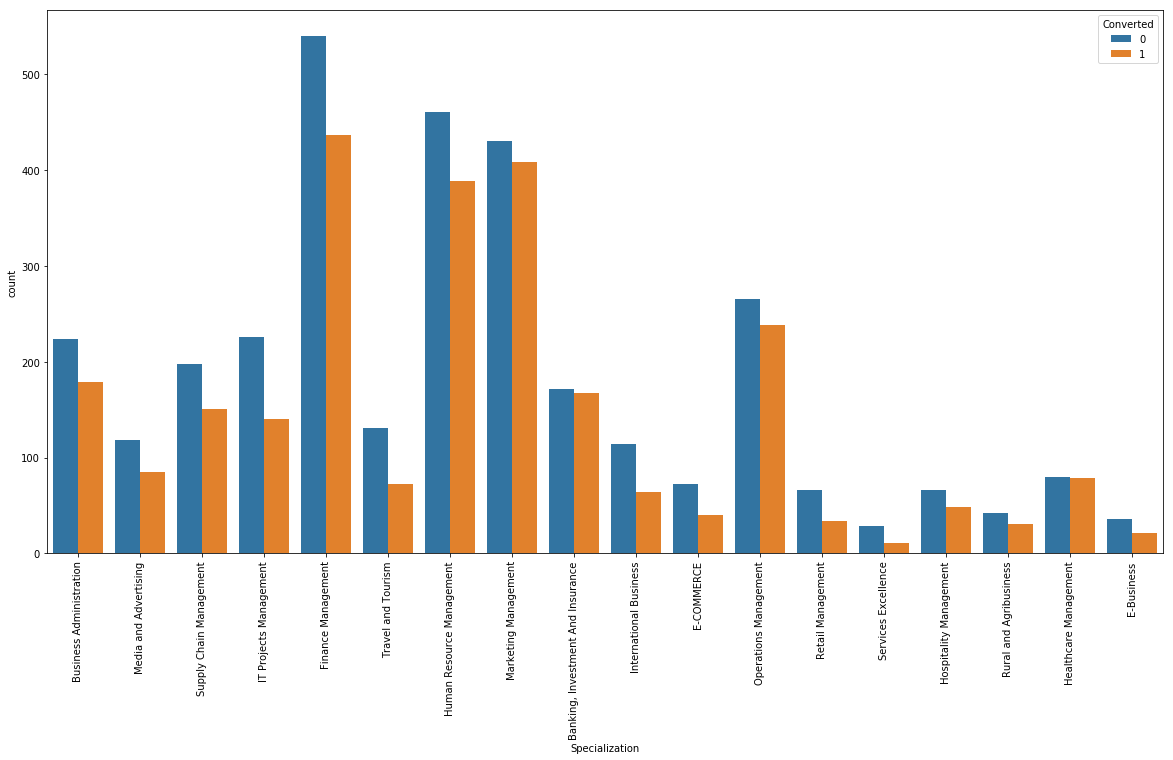

In [15]:
#Checking which Specialization people had converted a lot 
plt.figure(figsize = (20,10))
sns.countplot(x='Specialization',hue='Converted', data=Leads_data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

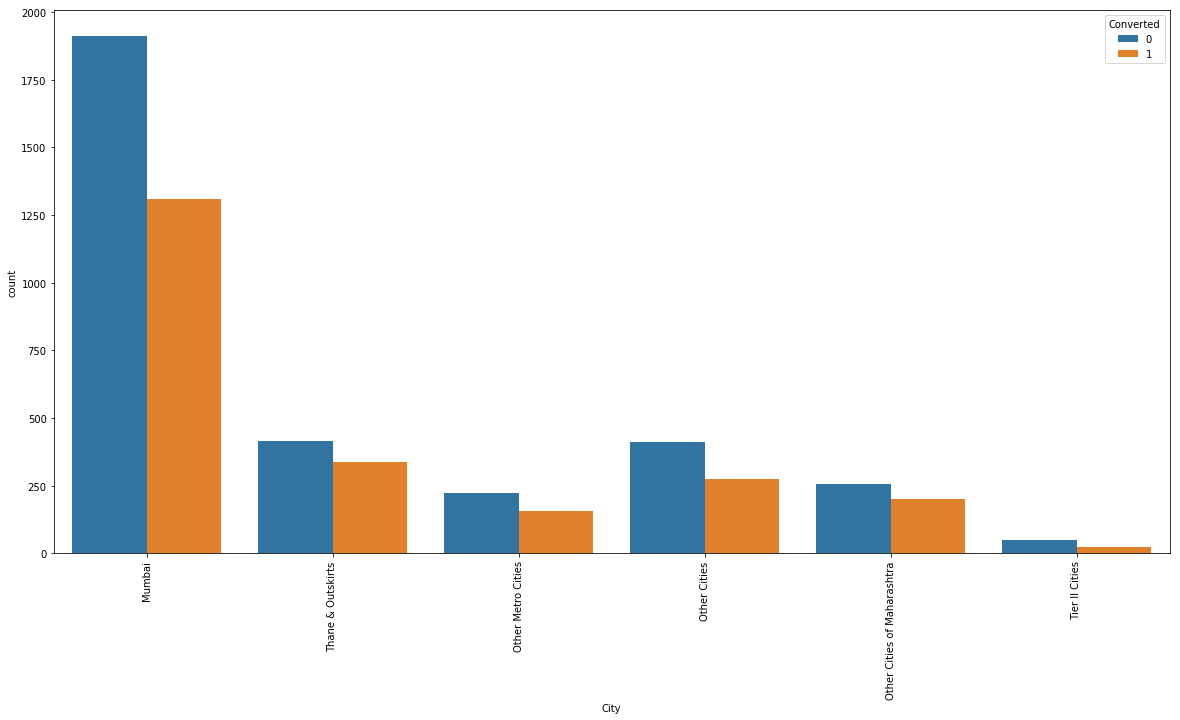

In [16]:
#Checking which Specialization people had converted a lot 
plt.figure(figsize = (20,10))
sns.countplot(x='City',hue='Converted', data=Leads_data)
plt.xticks(rotation=90)

 Mumbai people looks to be converted a lot 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

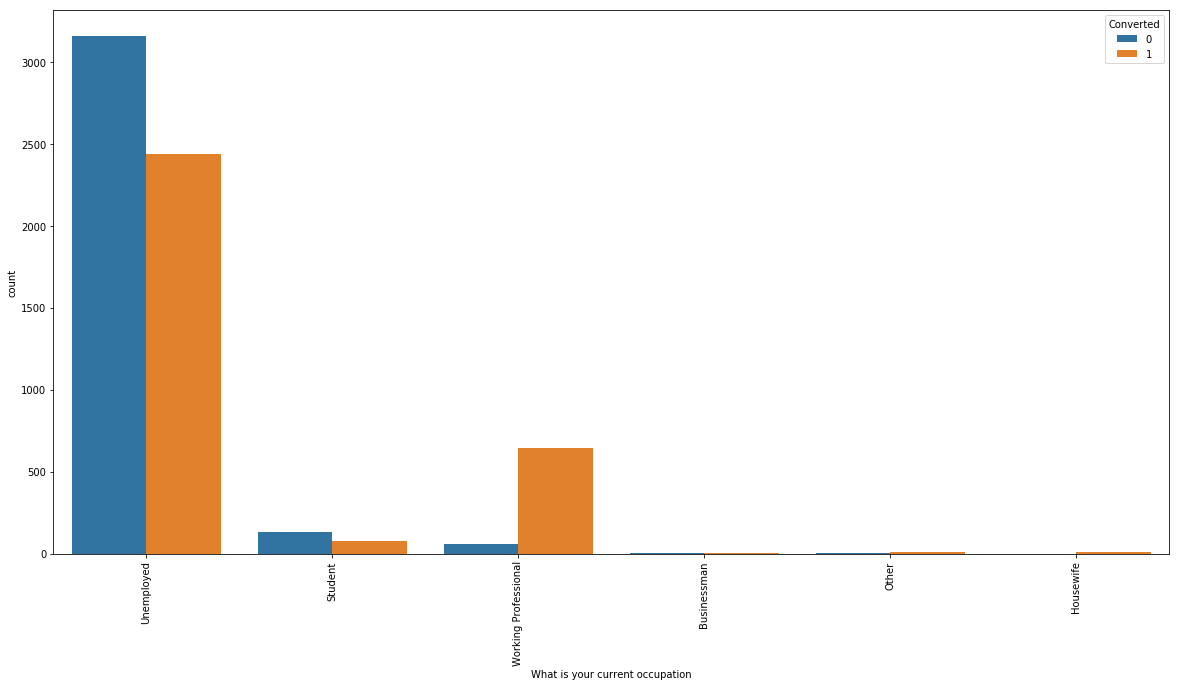

In [17]:
#Checking What is your current occupation people had converted a lot 
plt.figure(figsize = (20,10))
sns.countplot(x='What is your current occupation',hue='Converted', data=Leads_data)
plt.xticks(rotation=90)

Unemployed people looks like to be converted more

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

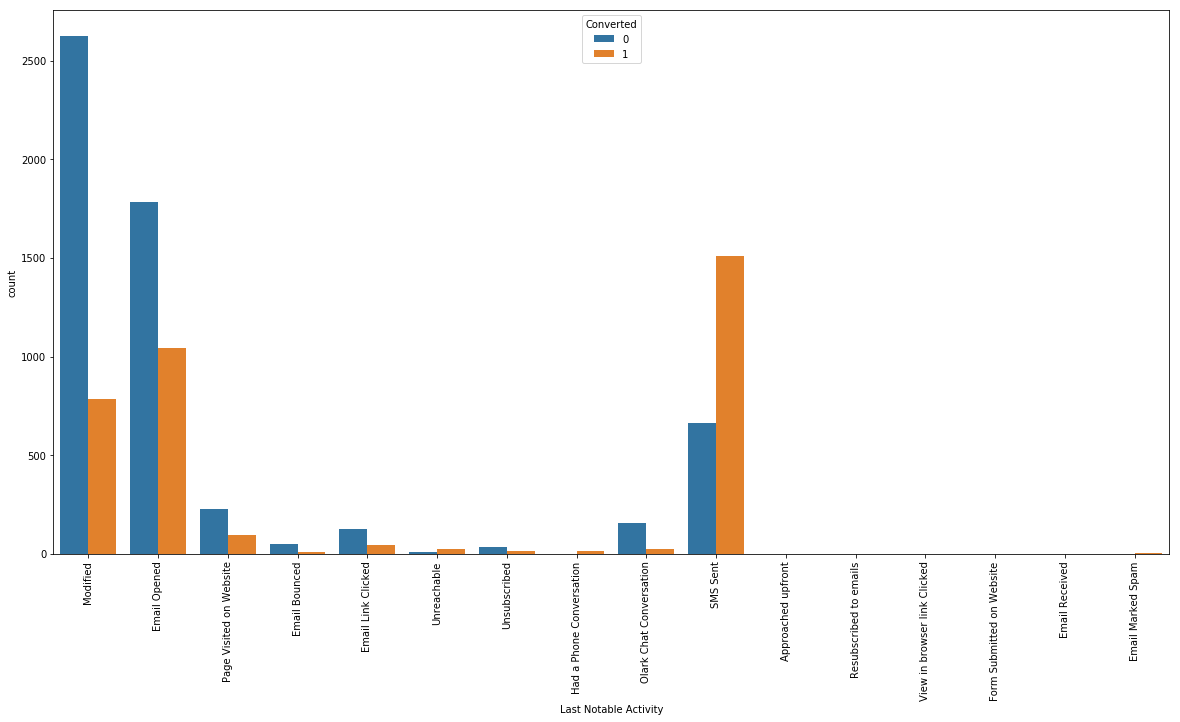

In [18]:
#Checking which Specialization people had converted a lot 
plt.figure(figsize = (20,10))
sns.countplot(x='Last Notable Activity',hue='Converted', data=Leads_data)
plt.xticks(rotation=90)

we should concentrate more on SMS Sent people

(array([0, 1]), <a list of 2 Text xticklabel objects>)

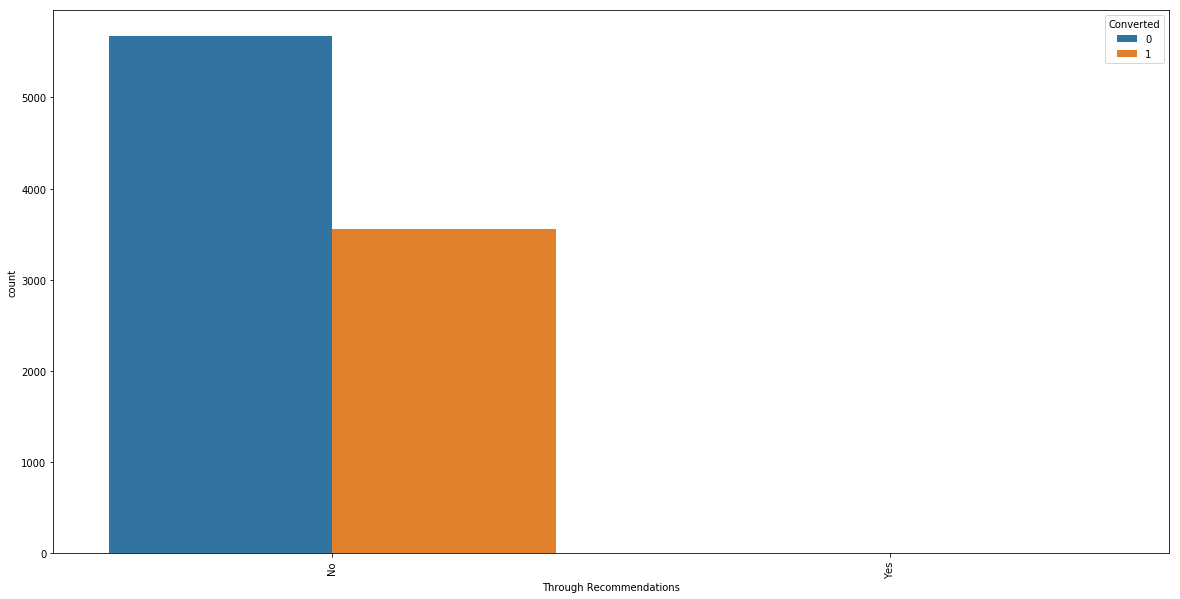

In [19]:
#Checking which Through Recommendations vs converted people
plt.figure(figsize = (20,10))
sns.countplot(x='Through Recommendations',hue='Converted', data=Leads_data)
plt.xticks(rotation=90)

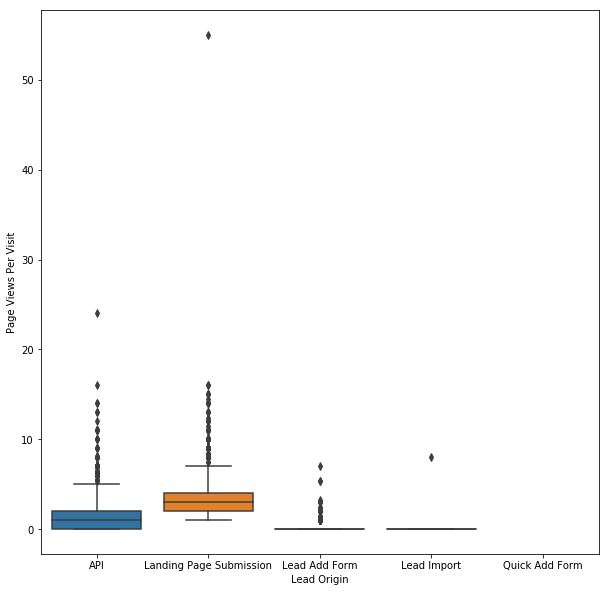

In [20]:
# Page view per visit vs Lead Origin
plt.figure(figsize = (10,10))
#sns.boxplot( x = 'Lead Origin', y = 'Page Views Per Visit',data = Leads_data)plt.figure(figsize = (10,10))
sns.boxplot( x = 'Lead Origin', y = 'Page Views Per Visit',data = Leads_data)

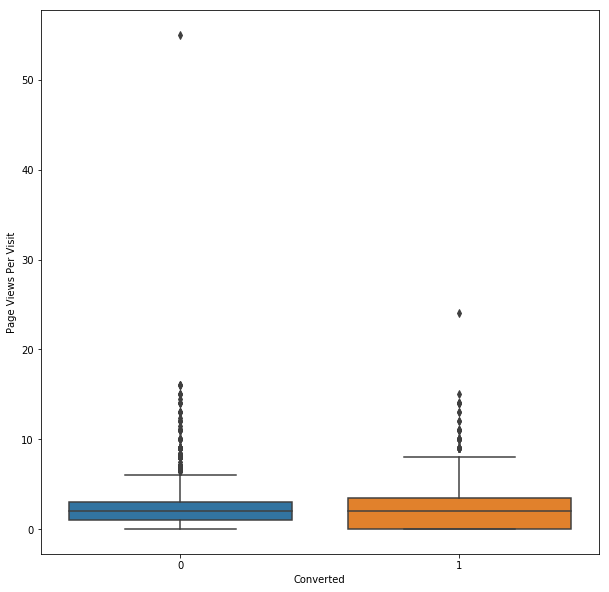

In [21]:
# Page view per visit vs converted
plt.figure(figsize = (10,10))
sns.boxplot( x = 'Converted', y = 'Page Views Per Visit',data = Leads_data)

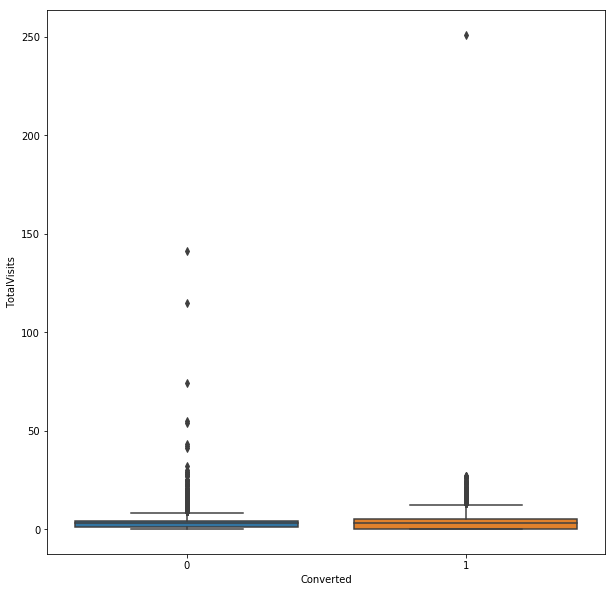

In [22]:
# Page view per visit vs Lead Origin
plt.figure(figsize = (10,10))
sns.boxplot( x = 'Converted', y = 'TotalVisits',data = Leads_data)

In [23]:
# Dropping the columns where missing values is grater than 50 % anmd less than 2%
Leads_data = Leads_data.drop(Leads_data.loc[:,list(round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)>50)].columns, 1)
Leads_data.shape

(9240, 34)

In [24]:
# Dropping other columns - As the NAN values are high for these columns and if we immute these value lot of variation will be there with tha actual data. so it's better to drop instead immuting them 
# df.drop(['C', 'D'], axis = 1) 
Leads_data = Leads_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Index',
                              'Asymmetrique Profile Index','Asymmetrique Activity Score','Tags'], axis =1)

In [25]:
# Checking percentage of null vlaues in each column 
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
# Now immuting the NAN values columns with the most repeated value in that particular column 
Leads_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [27]:
# Top here in the country column value is india so replacing NAN values with india for all empty rows 
Leads_data['Country']= Leads_data['Country'].replace(np.nan, 'India')

In [28]:
# Now immuting the NAN values columns with the most repeated value in the Lead Source column 
Leads_data['Lead Source'].describe()

count       9204
unique        20
top       Google
freq        2873
Name: Lead Source, dtype: object

In [29]:
# Top here in the Lead Source column value is Google so replacing NAN values with Google for all empty rows 
Leads_data['Lead Source']= Leads_data['Lead Source'].replace(np.nan, 'Google')

In [30]:
# Now immuting the NAN values columns with the most repeated value in the Specialization column 
Leads_data['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [31]:
# Top here in the Specialization column value is Finance Management so replacing NAN values with Finance Management for all empty rows 
Leads_data['Specialization']= Leads_data['Specialization'].replace(np.nan, 'Finance Management')

In [32]:
# Now immuting the NAN values columns with the most repeated value in the What is your current occupation column 
Leads_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [33]:
# Top here in the Specialization column value is unemployed so replacing NAN values withunemployed for all empty rows 
Leads_data['What is your current occupation']= Leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [34]:
# Now immuting the NAN values columns with the most repeated value in the What is your current occupation column 
Leads_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [35]:
# Top here in the Specialization column value is unemployed so replacing NAN values with Better Career Prospects for all empty rows 
Leads_data['What matters most to you in choosing a course']= Leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [36]:
# Now immuting the NAN values columns with the most repeated value in the What is your current occupation column 
Leads_data['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [37]:
# Top here in the City column value is Mumbai so replacing NAN values withunemployed for all empty rows 
Leads_data['City']= Leads_data['City'].replace(np.nan, 'Mumbai')

In [38]:
# Checking percentage of null vlaues in each column 
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [39]:
#Now we can see the columns has very less NAN values. Dropping the rows which has NAN values (We will loose only < 2% of the data)
Leads_data.dropna(inplace = True)
Leads_data.shape


(9103, 29)

In [40]:
# now if we look at the missing value percentagewe have 0 whcih means the data is clean and ready to perform logistic regression 
round(100*(Leads_data.isnull().sum()/len(Leads_data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

# Step3: Data Preparation

In [41]:
Leads_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [42]:
# List of variables to map
#'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque',
#
varlist =  ['Do Not Email', 'Do Not Call', 'Newspaper', 'Digital Advertisement', 
            'Through Recommendations','Search','Magazine','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations',     
            'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads_data[varlist] = Leads_data[varlist].apply(binary_map)

In [43]:
Leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,No,No,No,Mumbai,No,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,No,No,No,Mumbai,No,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,No,No,No,Mumbai,No,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,No,No,No,Mumbai,No,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,No,No,No,Mumbai,No,0,Modified


In [44]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                   'What is your current occupation','What matters most to you in choosing a course',
                                    'City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Leads_data = pd.concat([Leads_data, dummy1], axis=1)

In [45]:
# We have created dummies for the below variables, so we can drop them, we are dropping some colum ns that we don't use
Leads_data = Leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                              'What is your current occupation','What matters most to you in choosing a course',
                              'City','Last Notable Activity'], 1)

In [46]:
Leads_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,India,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,0,...,0,0,1,0,0,0,0,0,0,0


In [47]:
Leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Columns: 103 entries, Prospect ID to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int64(13), object(6), uint8(82)
memory usage: 2.2+ MB


In [48]:
# Checking for missing values 
Leads_data.isnull().sum()

Prospect ID                                                                0
Lead Number                                                                0
Do Not Email                                                               0
Do Not Call                                                                0
Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
Country                                                                    0
Search                                                                     0
Magazine                                                                   0
Newspaper Article                                                          0
X Education Forums                                                         0

As we don't have any missing values. Proceeding with splitting the data 
### Step 4: Test-Train Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Splitting data into test and training datasets 

# Putting feature variable to X
X = Leads_data.drop(['Prospect ID','Lead Number','Country','Converted','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content','Get updates on DM Content',
                     'I agree to pay the amount through cheque'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# Putting response variable to y - converted
y = Leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

O:\AAnaconda_IIIT\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
O:\AAnaconda_IIIT\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,0,0,0.695064,-0.771066,2.111481,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0.301082,-0.571257,0.061483,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,0,0,2.074000,1.393834,0.517039,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0,0,-0.683873,-0.881052,-1.077404,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
### Checking the converted Rate
converted = (sum(Leads_data['Converted'])/len(Leads_data['Converted'].index))*100
converted

38.02043282434362

### Step 6: Model Building 
#### Running First Training Model

In [56]:
import statsmodels.api as sm

In [57]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           89
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 26 Aug 2019   Deviance:                          nan
Time:                        22:14:38   Pearson chi2:                 6.78e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     3.29e+15   8.19e+07   4.01e+07      0.000    3.29e+15    3.29e+15
Do Not Email                                                            -7.025e+14   4.42e+06  -1.59e+08      0.000   -7.02e+14   -7.02e+14
Do Not Call                                                                8.1e+15   4.77e+07    1.7e+08      0.000     8.1e+15     8.1e+15
TotalVisits                                                               7.06e+13   1.01e+06   6.96e+07      0.000    7.06e+13    7.06e+13
Total Time Spent on Website                                              1.742e+14   9.75e+05   1.79e+08      0.000    1.74e+14    1.74e+14
Page Views Per Visit                                                     3.062e+13   1.21e+06   2.52e+07      0.000    3.06e+13    3.06e+13
Search                                                                    4.23e+14   2.23e+07    1.9e+07      0.000    4.23e+14    4.23e+14
Magazine                                                                  604.5028    1.4e-06   4.32e+08      0.000     604.503     604.503
Newspaper Article                                                       -2.336e+16   4.24e+07  -5.51e+08      0.000   -2.34e+16   -2.34e+16
X Education Forums                                                      -2.336e+16   4.24e+07  -5.51e+08      0.000   -2.34e+16   -2.34e+16
Newspaper                                                               -7.031e+16   6.72e+07  -1.05e+09      0.000   -7.03e+16   -7.03e+16
Digital Advertisement                                                   -5.834e+14   3.89e+07   -1.5e+07      0.000   -5.83e+14   -5.83e+14
Through Recommendations                                                  1.083e+15   3.16e+07   3.43e+07      0.000    1.08e+15    1.08e+15
A free copy of Mastering The Interview                                   1.064e+14   2.64e+06   4.03e+07      0.000    1.06e+14    1.06e+14
Lead Origin_Landing Page Submission                                     -8.062e+13   2.95e+06  -2.73e+07      0.000   -8.06e+13   -8.06e+13
Lead Origin_Lead Add Form                                                1.291e+15   1.61e+07   8.04e+07      0.000    1.29e+15    1.29e+15
Lead Origin_Lead Import                                                  1.303e+15   4.81e+07   2.71e+07      0.000     1.3e+15     1.3e+15
Lead Source_Direct Traffic                                              -7.941e+14   3.74e+07  -2.13e+07      0.000   -7.94e+14   -7.94e+14
Lead Source_Facebook                                                    -2.626e+15   6.09e+07  -4.31e+07      0.000   -2.63e+15   -2.63e+15
Lead Source_Google                                                      -7.766e+14

In [58]:
# Let's see the correlation matrix 
#plt.figure(figsize = (10,5))        # Size of the figure
#sns.heatmap(Leads_data.corr(),annot = True)

### Step 7: Feature Selection Using RFE

In [59]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [61]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False])

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 45),
 ('Search', False, 73),
 ('Magazine', False, 80),
 ('Newspaper Article', False, 42),
 ('X Education Forums', False, 41),
 ('Newspaper', False, 5),
 ('Digital Advertisement', False, 25),
 ('Through Recommendations', False, 26),
 ('A free copy of Mastering The Interview', False, 78),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 39),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 64),
 ('Lead Source_Live Chat', False, 62),
 ('Lead Source_NC_EDM', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Pay per Click Ads', False, 61),
 ('Lead Source_Press_Release', False, 79),
 ('Lead Source_Reference', False, 29),
 ('Lead Sourc

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [64]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       '

##### Assessing the model with StatsModels

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.7
Date:                Mon, 26 Aug 2019   Deviance:                       5331.3
Time:                        22:14:41   Pearson chi2:                 6.49e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3572      0.052    -26.187      0.000      -1.459      -1.256
Do Not Email                                            -1.2796      0.189     -6.767      0.000      -1.650      -0.909
Total Time Spent on Website                              1.1157      0.040     28.012      0.000       1.038       1.194
Lead Origin_Lead Add Form                                3.9714      0.223     17.795      0.000       3.534       4.409
Lead Origin_Lead Import                                  1.4272      0.445      3.204      0.001       0.554       2.300
Lead Source_Olark Chat                                   1.1257      0.103     10.904      0.000       0.923       1.328
Lead Source_Welingak Website                             1.9528      0.757      2.581      0.010       0.470       3.436
Last Activity_Converted to Lead                         -1.3222      0.210     -6.303      0.000      -1.733      -0.911
Last Activity_Email Bounced                             -0.8435      0.359     -2.350      0.019      -1.547      -0.140
Last Activity_Had a Phone Conversation                   0.8585      0.850      1.010      0.313      -0.808       2.525
Last Activity_Olark Chat Conversation                   -1.4459      0.160     -9.050      0.000      -1.759      -1.133
What is your current occupation_Housewife               23.2306    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Working Professional     2.8165      0.188     15.007      0.000       2.449       3.184
Last Notable Activity_Had a Phone Conversation           2.0910      1.408      1.485      0.138      -0.669       4.851
Last Notable Activity_SMS Sent                           1.4889      0.080     18.679      0.000       1.333       1.645
Last Notable Activity_Unreachable                        1.7469      0.509      3.431      0.001       0.749       2.745
========================================================================================================================
"""

In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

7962    0.855556
5520    0.098189
1962    0.119773
1566    0.953220
9170    0.228894
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85555618, 0.09818892, 0.11977313, 0.95322022, 0.22889394,
       0.22889394, 0.48505155, 0.14156797, 0.56815775, 0.47179061])

##### Creating a dataframe with the actual converted members and the predicted probabilities

In [68]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.855556,7962
1,0,0.098189,5520
2,0,0.119773,1962
3,1,0.953220,1566
4,0,0.228894,9170


##### Creating new column 'predicted' with 1 if C onverted_Prob > 0.5 else 0

In [69]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the top values
y_train_pred_final.head(10)

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.855556,7962,1
1,0,0.098189,5520,0
2,0,0.119773,1962,0
3,1,0.953220,1566,1
4,0,0.228894,9170,0
5,0,0.228894,5097,0
6,0,0.485052,8954,0
7,1,0.141568,309,0
8,1,0.568158,5519,1
9,1,0.471791,1050,0


### Confusion Matrix

In [70]:
from sklearn import metrics

In [71]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3504  449]
 [ 737 1682]]


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8138731952291274


### Checking variance inflation factor (VIF's)

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Had a Phone Conversation,2.00
12,Last Notable Activity_Had a Phone Conversation,2.00
0,Do Not Email,1.75
7,Last Activity_Email Bounced,1.72
4,Lead Source_Olark Chat,1.56
2,Lead Origin_Lead Add Form,1.50
9,Last Activity_Olark Chat Conversation,1.35
5,Lead Source_Welingak Website,1.32
1,Total Time Spent on Website,1.27
13,Last Notable Activity_SMS Sent,1.20


All variables have a good value of VIF. So we need not drop any variables and we can proceed with making predictions using this model.

## Metrics beyond simply accuracy

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity (true positive rate) of our logistic regression model
TP / float(TP+FN)

0.6953286482017362

Higher the sensitivity, better it is amongst other measures in a logistic model.

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.8864153807235011

In [78]:
# Calculate false postive rate - predicting Converted when Leads does not have converted
print(FP/ float(TN+FP))

0.11358461927649886


In [79]:
# positive predictive value 
print (TP / float(TP+FP))

0.7893007977475364


In [80]:
# Negative predictive value
print (TN / float(TN+ FN))

0.826220231077576


### ROC Curve

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

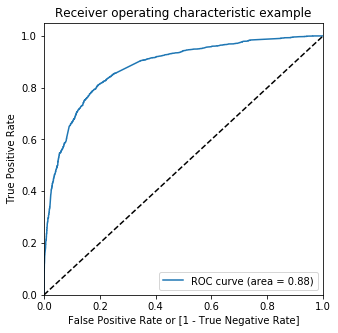

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [84]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob))

'0.88'

#### We see an overall AUC score of 0.88 looks like we did a decent job.

### Step 10: Finding Optimal Cutoff Point 
It is the prob where we get balanced sensitivity and specificity

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.855556,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.098189,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.119773,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.953220,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.228894,9170,0,1,1,1,0,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.579724  0.967755  0.342272
0.2   0.2  0.737445  0.910707  0.631419
0.3   0.3  0.797238  0.831749  0.776119
0.4   0.4  0.813873  0.768086  0.841892
0.5   0.5  0.813873  0.695329  0.886415
0.6   0.6  0.796453  0.582059  0.927650
0.7   0.7  0.781701  0.505581  0.950670
0.8   0.8  0.762084  0.420422  0.971161
0.9   0.9  0.713434  0.262919  0.989122


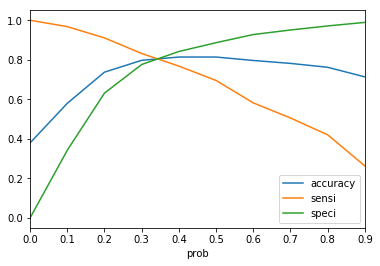

In [87]:
# plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.855556,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.098189,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.119773,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.953220,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.228894,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7972379158819837

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3068,  885],
       [ 407, 2012]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


0.8317486564696155

In [93]:
# Let us calculate specificity
TN / float(TN+FP)


0.7761194029850746

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))


0.22388059701492538


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))


0.6945115636865723


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8828776978417266


# Assigning a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

In [97]:
 # Lead Score
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.855556,7962,1,1,1,1,1,1,1,1,1,1,0,1,86
1,0,0.098189,5520,0,1,0,0,0,0,0,0,0,0,0,0,10
2,0,0.119773,1962,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.953220,1566,1,1,1,1,1,1,1,1,1,1,1,1,95
4,0,0.228894,9170,0,1,1,1,0,0,0,0,0,0,0,0,23


## Precision and Recall

In [98]:
# confusion Matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3504,  449],
       [ 737, 1682]], dtype=int64)

In [99]:
# Precision - TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7893007977475364

In [100]:
 # Recall - TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6953286482017362

In [101]:
# Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [102]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7893007977475364

In [103]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6953286482017362

### Precision and recall tradeoff

In [104]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
 5       0
 6       0
 7       1
 8       1
 9       1
 10      0
 11      0
 12      0
 13      0
 14      1
 15      1
 16      0
 17      0
 18      1
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      1
 26      0
 27      0
 28      1
 29      0
        ..
 6342    1
 6343    0
 6344    0
 6345    1
 6346    1
 6347    1
 6348    0
 6349    0
 6350    1
 6351    0
 6352    0
 6353    1
 6354    0
 6355    0
 6356    0
 6357    1
 6358    0
 6359    0
 6360    0
 6361    0
 6362    0
 6363    1
 6364    0
 6365    1
 6366    1
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
 5       0
 6       0
 7       0
 8       1
 9       0
 10      0
 11      0
 12      0
 13      0
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

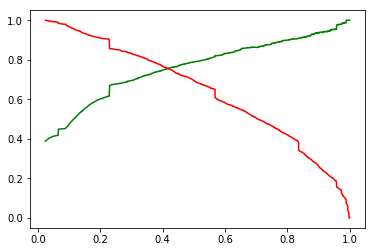

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [107]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])


O:\AAnaconda_IIIT\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
O:\AAnaconda_IIIT\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [108]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3504,0,-0.108519,0,0,0,0,0,0,0,0,0,0,0,0,0
4050,0,-0.888077,1,0,0,0,0,0,0,0,0,0,0,1,0
7201,1,0.420993,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,0,-0.110357,0,0,0,0,0,0,0,0,0,0,0,0,0
8219,0,-0.433947,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
X_test_sm = sm.add_constant(X_test)

In [110]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [111]:
y_test_pred[:10]

3504    0.185686
4050    0.957394
7201    0.336670
1196    0.185376
8219    0.136888
8747    0.227513
9048    0.482359
6524    0.119704
7693    0.137385
8187    0.957394
dtype: float64

In [112]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.185686
4050,0.957394
7201,0.336670
1196,0.185376
8219,0.136888


In [113]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [114]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [115]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [116]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.185686
1,1,4050,0.957394
2,0,7201,0.336670
3,0,1196,0.185376
4,1,8219,0.136888


In [117]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,3504,0.185686
1,1,4050,0.957394
2,0,7201,0.336670
3,0,1196,0.185376
4,1,8219,0.136888


In [118]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob,final_predicted
0,0,3504,0.185686,0
1,1,4050,0.957394,1
2,0,7201,0.336670,0
3,0,1196,0.185376,0
4,1,8219,0.136888,0


In [119]:
# Checking the overall accuracy on test data set 
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8125228853899671

### The overall accuracy on Test and Training data set seems to be almost equal


In [120]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1497,  192],
       [ 320,  722]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
#Sensitivity of our logistic regression model for test dataset
TP / float(TP+FN)

0.6928982725527831

In [123]:
# calculating the specificity for test dataset
TN / float(TN+FP)

0.8863232682060391